# Importation des packages

In [1]:
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np

import matplotlib.pyplot as plt

# Importation des données

In [2]:
# Data frame
iris = load_iris()

X = iris.data[:, ]
Y = iris.target

# Séparation du jeu d'entraînement et de test

Utilisez la fonction `train_test_split` de sklearn pour séparer le jeu de données d'entraînement du jeu de données de test.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Normalisation des données

Utilisez la fonction `StandardScaler` pour standardiser les données d'entraînement et les données de tesT.

In [4]:
scaler = StandardScaler().fit(x_train)

x_train_norm = scaler.transform(x_train)

x_test_norm = scaler.transform(x_test)

# Entraîner un modèle de K-means

Utilisez la fonction `KMeans` de sklearn pour initialiser un modèle de Kmeans avec k=2 pour trouver deux classes parmi nos données.

In [13]:
km = KMeans(2)

KMeans(n_clusters=2)

Entraînre le modèle en utilisant la méthode `fit`.

In [ ]:
km.fit(x_train_norm)

Prédire les données du jeu d'entraînement en utilisant la méthode `predict`.

In [14]:
# Prediction on train set
train_pred = km.predict(x_train_norm)

Visualiser les classes obtenus sur le jeu d'entraînement.

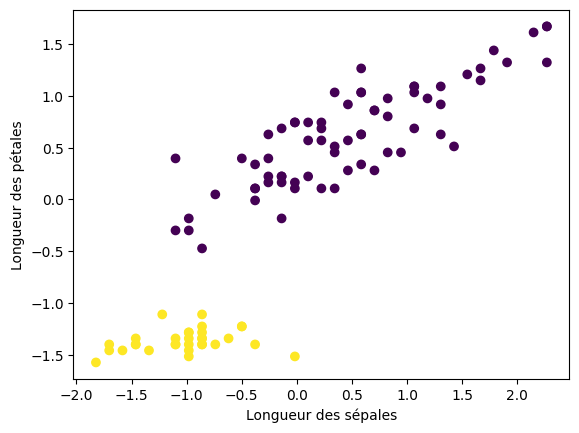

In [15]:
plt.scatter(x_train_norm[:, 0], x_train_norm[:, 2], c=train_pred)
plt.xlabel('Longueur des sépales')
plt.ylabel('Longueur des pétales')
plt.show()

# Détermination du nombre de classe

Vous allez maintenant déterminer le nombre de classes idéal grâce à la méthode du coude.

In [5]:
k_range = np.arange(2, 10)
distortion_value = []

for k in k_range:
  km = KMeans(k)

  km.fit(x_train_norm)

  distortion_value = np.append(distortion_value, km.inertia_)

Visualisez où se trouve le coude.

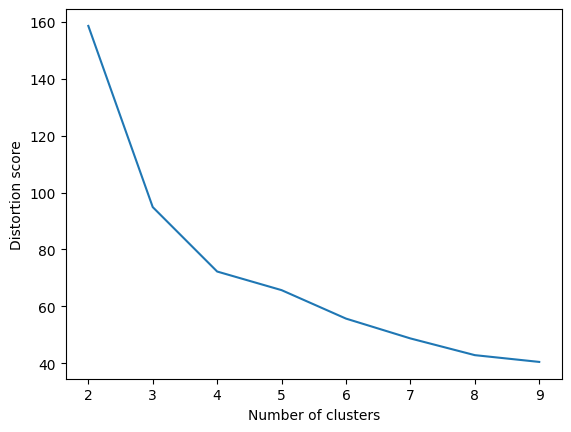

In [6]:
plt.plot(k_range, distortion_value)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.show()

# Entraînement du modèle

Entraîner le modèle avec un nombre k de classes égale au nombre idéal de classe déterminé par la méthode du coude précédente.

In [7]:
# Initialization
km = KMeans(3)

KMeans(n_clusters=3)

Entraînez le modèle avec la méhotde `fit`.

In [ ]:
# Training
km.fit(x_train_norm)

# Calcul de performance du modèle

Appliquez le modèle sur les jeux d'entraînement et de test.

In [8]:
# Prediction on train set
train_pred = km.predict(x_train_norm)

# Prediction on test set
test_pred = km.predict(x_test_norm)

Calculez le silhouette score pour le jeu d'entraînement et le jeu de test.

In [9]:
# Silhouette score for the training set
print(silhouette_score(x_train_norm, train_pred))

# Silhouette score for the test set
print(silhouette_score(x_test_norm, test_pred))

0.4836734959162358
0.4210004812765778


# Visualisation des classes sur les variables longueur sepal et pétale

In [10]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

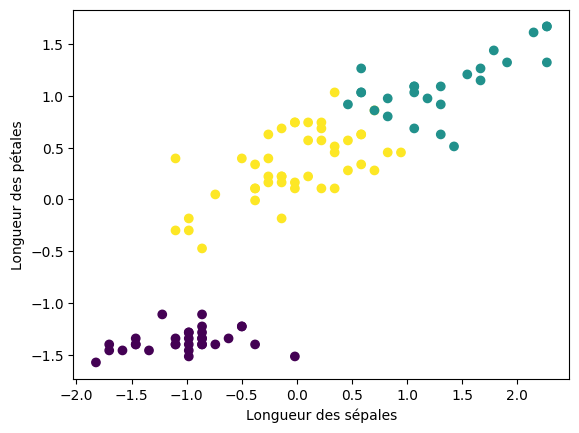

In [11]:
plt.scatter(x_train_norm[:, 0], x_train_norm[:, 2], c=train_pred)
plt.xlabel('Longueur des sépales')
plt.ylabel('Longueur des pétales')
plt.show()

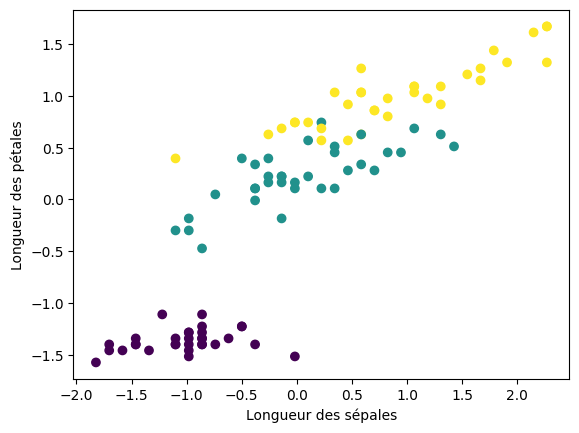

In [12]:
plt.scatter(x_train_norm[:, 0], x_train_norm[:, 2], c=y_train)
plt.xlabel('Longueur des sépales')
plt.ylabel('Longueur des pétales')
plt.show()